<a href="https://colab.research.google.com/github/SalhRosas/Pepperdine/blob/main/Salvador_Rosas_Quiz1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, names=column_names)
print("Number of samples: %d" % len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Write a code that shows how many unique values are in the 'rings' column?

In [4]:
uv= pd.value_counts(df.rings)
uv1 = pd.Series({'UNIQUE': len(uv), 'unique values':uv.index.tolist()})
uv.append(uv1)

<ipython-input-4-aaf8cf5ddbdf>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uv.append(uv1)


9                                                              689
10                                                             634
8                                                              568
11                                                             487
7                                                              391
12                                                             267
6                                                              259
13                                                             203
14                                                             126
5                                                              115
15                                                             103
16                                                              67
17                                                              58
4                                                               57
18                                                            

Assume that we want to estimate diameter of a sample through linear regression, based on the correlation matrix suggest two predictors.

- The two predictors that would be used to estimate the diameter of a given sample through linear regression would be lenght and whole weight as these two have thes highest correlation to diameter.

In [5]:
# Import LabelEncoder for converting categorical variables into numerical (dummy) variables
from sklearn import preprocessing as prep

#creating labelEncoder
le = prep.LabelEncoder()

# Converting categorical variables into numberic variables
df['sex']=le.fit_transform(df['sex']) # Female= 0 Male = 2 I= 1

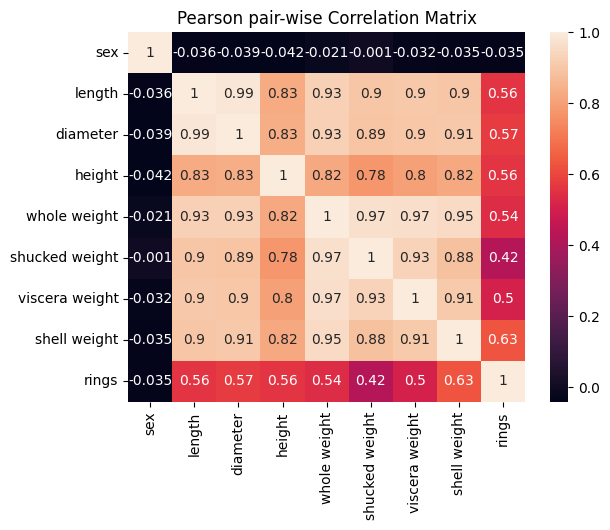

In [6]:
correlation_matrix = df.corr(method='pearson').round(3) # 2 decimal accuracy
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

Why we break our dataset into test and train?
Is it necassary to do it when we want to make a regression model? Explain!

- By splitting the dataset into training and test sets we are able to build a Naive Bayes model using the training data simulating real world scenarios. This helps prevent overfiting your actual test (real world) data set. 

Explain logistic regression algorithm?

- Logistic regression is used to model the relationship between the set independent variables and dependent variables the probability of the binary outcome. 
This algorithm is used for classification in which the user  is attempting to predict the probability of a dependent variable belonging to a given class or not. Logistic algorithm is considered a supervised machine learning algorithm, which means the data set has preset labelled inputs and outputs. 

Why do we have a dummy classifier?

- Dummy classifiers are used to test and evaluate the strenght of your model and helps you determine if your model is effective or needs some improvement and adjusting. 

Assume that we are interested in predicting Infants, what is the value of the following parameters (use the Confusion Matrix for Logstic Regression Classifier):

True Postive:358

True Negative: 651  #120+176+131+224

Recall: 0.78

In [7]:
# Select X variables
X = df.drop(columns = ['sex'])

# Select Target "Y Variable"
y = df['sex']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=30)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (2923, 8)
Shape of testing feature: (1254, 8)
Shape of training label: (2923,)
Shape of training label: (1254,)


In [8]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5598086124401914


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


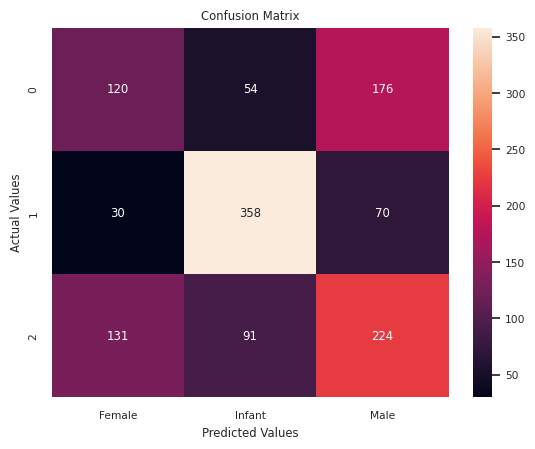

In [9]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['Female','Infant','Male'])

from seaborn import set
from seaborn import set_style

set(font_scale=.7)
#Plotting the confusion matrix
plt.figure
sns.heatmap(cm_df, annot=True, fmt= 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [10]:
print('Classification Report')
target_names = ['Female','Infant','Male']
print(classification_report(y_test, predictions, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Female       0.43      0.34      0.38       350
      Infant       0.71      0.78      0.75       458
        Male       0.48      0.50      0.49       446

    accuracy                           0.56      1254
   macro avg       0.54      0.54      0.54      1254
weighted avg       0.55      0.56      0.55      1254



Why do we make a distinction between type 1 and type 2 errors? Use an example to convey your point.

What is the difference between clustering and classification?

- Type 1 error is known as the false positive, occuring when we reject a true null hypothesis. Typw 2 error is known as a false negavite, occuring when we fail to reject a false null hypothesis. 

Ex: A pharmaceuticalcompany develops a new drug belived to cure cancer. Their null hypothesis is that the drug has no effect, and their HA is that the drug is effective in curing cancer. A type 2 error would be if the company fails to reject the null hypothesis and failing to see the drugs effectiveness due to possibly too small a sample size or flawed study design. 

- While both methods share similarites classification is a supervised learning method having predefined labels to each input, and once properly trained the model sorts data into specific categories. Clusterring however, is an unsupervised learning method partitioning based on similarities within a given data set.